<a href="https://colab.research.google.com/github/Nao-Ishi/pray_py/blob/master/3pich_man_ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import math

No handles with labels found to put in legend.
No handles with labels found to put in legend.


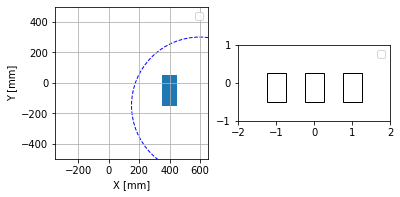

In [23]:
import matplotlib.patches as patches
###############################
#キャンパス設定

fig = plt.figure()
#plt.cla()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=1.0)
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

Mx=650
mx=-350
My=500
my=-500

ax.set_xlim(mx,Mx)
ax.set_ylim(my,My)
ax.set_aspect('equal')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')

ax.grid(True)

ax.legend()
################################

cir_r = 450
cir_x = 600
cir_y = -150

rect_w = 100
rect_h = 200
rect_x = 400
rect_y = -150

################################
#   _________
#   |       |
#   |       |
#   |       |
#   |   .   |   (x,y)
#   ^^^^^^^^^
################################

c = patches.Circle(xy=(cir_x, cir_y), radius=cir_r, ec='b', ls='--',fill=False)
r = patches.Rectangle(xy=(rect_x-(rect_w/2), rect_y), width=rect_w, height=rect_h)
ax.add_patch(c)
ax.add_patch(r)

Mx=2
mx=-2
My=1
my=-1

ax2.set_xlim(mx,Mx)
ax2.set_ylim(my,My)
ax2.set_aspect('equal')

#ax2.set_xlabel('X [mm]')
#ax2.set_ylabel('Y [mm]')

#ax.grid(True)

ax2.legend()

r = patches.Rectangle(xy=(-1.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(-0.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(0.75,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)


#step_test = ax.plot(0.05,0.9,'',transform=ax.transAxes)
plt.show()

In [0]:
T = np.arange(130.0,195.0)
tag, = ax.plot([0], [0], 'yo')
p1, = ax.plot([0], [0], 'bo')
p2, = ax.plot([0], [0], 'ro')
p3, = ax.plot([0], [0], 'go')
l1, = ax.plot([0, 0], [0, 0], 'g')
l1_, = ax2.plot([0, 0], [0, 0], 'g')
l2, = ax.plot([0, 0], [0, 0], 'b')
l2_, = ax2.plot([0, 0], [0, 0], 'b')
l3, = ax.plot([0, 0], [0, 0], 'r')
l3_, = ax2.plot([0, 0], [0, 0], 'r')
L1 = 150
L2 = 250
PI = np.pi

Sheta = np.array([[0.0]*3 for i in range(len(T))])

def draw_ani(t):
    at = np.radians(T[t])
    xt = np.cos(at) * cir_r + cir_x
    yt = np.sin(at) * cir_r + cir_y
    ##########################
    #https://so-zou.jp/robot/tech/kinematics/inverse-kinematics.htm#
    alpha = np.arccos(
        ((-1)*(xt*xt+yt*yt)+L2*L2+L1*L1)
        /(2*L1*L2)
    )
    
    beta = np.arccos(
        ((-1)*(L2*L2)+(L1*L1)+(xt*xt+yt*yt))
        /(2*L1*np.sqrt(xt*xt+yt*yt))
    )
    sheta1 = np.arctan2(yt,xt)-beta
    sheta2 = (PI - alpha)
    ##########################
    xp1 = np.cos(sheta1)*L1
    yp1 = np.sin(sheta1)*L1
    p1.set_data(xp1,yp1)

    xp2 = np.cos(sheta1+sheta2)*L2
    yp2 = np.sin(sheta1+sheta2)*L2
    p2.set_data(xp1+xp2,yp1+yp2)

    sheta3 = np.arctan2(
        (-yp1-yp2+rect_y+rect_h/2)
        ,(-xp1-xp2+rect_x)
    )
    xp3 = np.cos(sheta3)*100
    yp3 = np.sin(sheta3)*100
    ##########################
    
    tag.set_data(xt, yt)
    l1.set_data([0,xp1],[0,yp1])
    l2.set_data([xp1,xp1+xp2],[yp1,yp1+yp2])
    l3.set_data([xp1+xp2,xp1+xp2+xp3],[yp1+yp2,yp1+yp2+yp3])
    ##########################
    
    xp1 = np.cos(sheta1)*0.5-1
    yp1 = np.sin(sheta1)*0.5
    l1_.set_data([-1,xp1],[0,yp1])

    xp2 = np.cos(sheta2)*0.5
    yp2 = np.sin(sheta2)*0.5
    l2_.set_data([0,xp2],[0,yp2])

    xp3 = np.cos(sheta3)*0.5+1
    yp3 = np.sin(sheta3)*0.5
    l3_.set_data([1,xp3],[0,yp3])
    ##########################
    Sheta[t][0]=sheta1
    Sheta[t][1]=sheta2
    Sheta[t][2]=sheta3
    return tag, #p1, p2, p3, l1, l2, l3, l1_,
  
ani = animation.FuncAnimation(
      fig,  # Figureオブジェクト
      draw_ani,  # グラフ描画関数
      frames = len(T),  # フレームを設定
      interval = 100,  # 更新間隔(ms)
      repeat = True,  # 描画を繰り返す
      blit = True  # blitting による処理の高速化
      )

ani.save('normaldist_kde_anim.gif', writer='pillow')